# Time Series - Part-1

We will cover the following in this Part-1

- Manipulate/Massage data
- Exploratory Data Analysis
- Trends and seasonality in time series data
    - Identifying Trends
    - Seasonal patterns
        - First Order Differencing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# sns.set()
sns.set(context='notebook', style='darkgrid', palette='deep', 
        font='sans-serif', font_scale=1.5, color_codes=False,
        rc={"lines.linewidth": 4})

#sns.set_context("paper")
#sns.set_context("talk")
#sns.set_context("poster")
#sns.set_context("notebook")

In [3]:
df = pd.read_csv('international-airline-passengers.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month         144 non-null object
Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


Let us change the `Month` column to real datetime values suitable for ***Time Series*** data 

In [5]:
df.Month = pd.to_datetime(df.Month)
df.set_index('Month', inplace=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Pandas has a plotting function and can be used as below:

In [6]:
#df.plot(figsize=(20,10) , linewidth=5, fontsize=20)
#plt.xlabel('Year', fontsize=20);

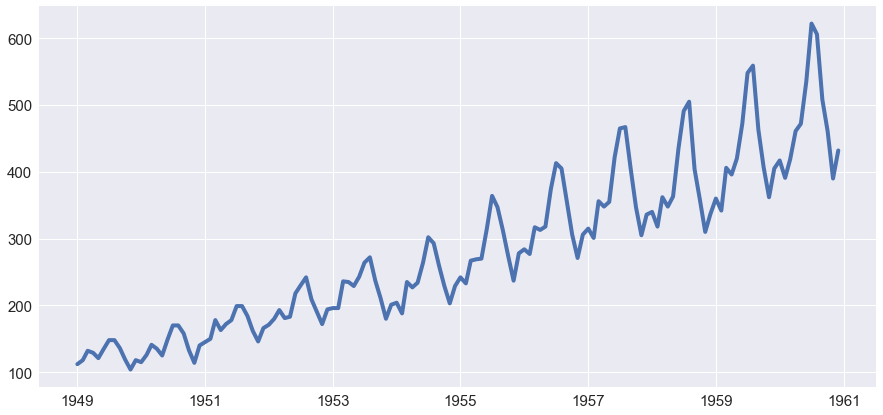

In [7]:
plt.figure(figsize=(15, 7))
plt.plot(df.Passengers)
plt.show()

Seaborn has plotting function for **TimeSeries**

In [8]:
# Seaborn has plotting function for TimeSeries

#plt.figure(figsize=(15, 7))
#sns.tsplot(df.Passengers, color="indianred")

The plot shows that there are seasonal ups and downs. Also the entire data has an upward trend.

### Trends and Seasonality

Among several ways to identify trends, the most commonly used technique is **Rolling Average**

>  Ror each time point, take the average of the points on either side of it. Note that the number of points is specified by a window size, which you need to choose.

What happens since you take the average, it tends to ***smooth*** out noise and seasonality.

For this, we can ***Rolling Average*** of `Passengers` using the built-in pandas methods.

For determining the window size, here, it makes sense to first try out one of `twelve months`, as you're talking about yearly seasonality.

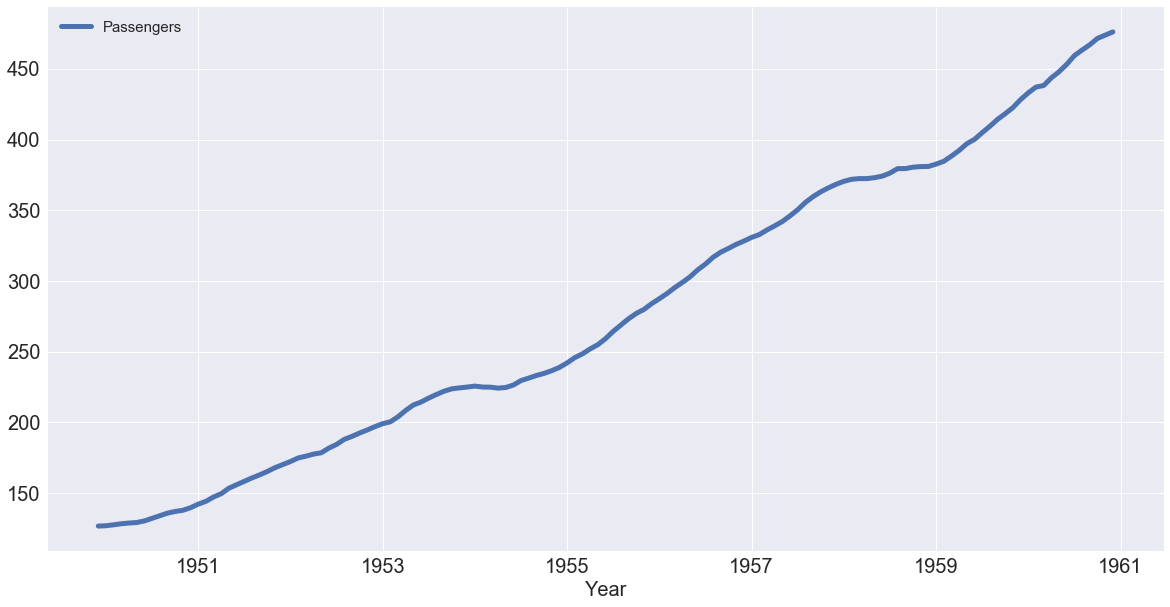

In [9]:
df.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

You have the trend that you're looking for! You have removed most of the seasonality compared to the previous plot.

### Seasonal Patterns in Time Series Data
One way to think about the seasonal components to the time series of your data is to remove the trend from a time series, so that you can more easily investigate seasonality. To remove the trend, you can subtract the trend you computed above (rolling mean) from the original signal.

One way to remove the trend is called `differencing`, where you look at the difference between successive data points (called `first-order differencing`, because you're only looking at the difference between one data point and the one before it).


#### First-order differencing
You can use pandas and the diff() and plot() methods to compute and plot the first order difference:

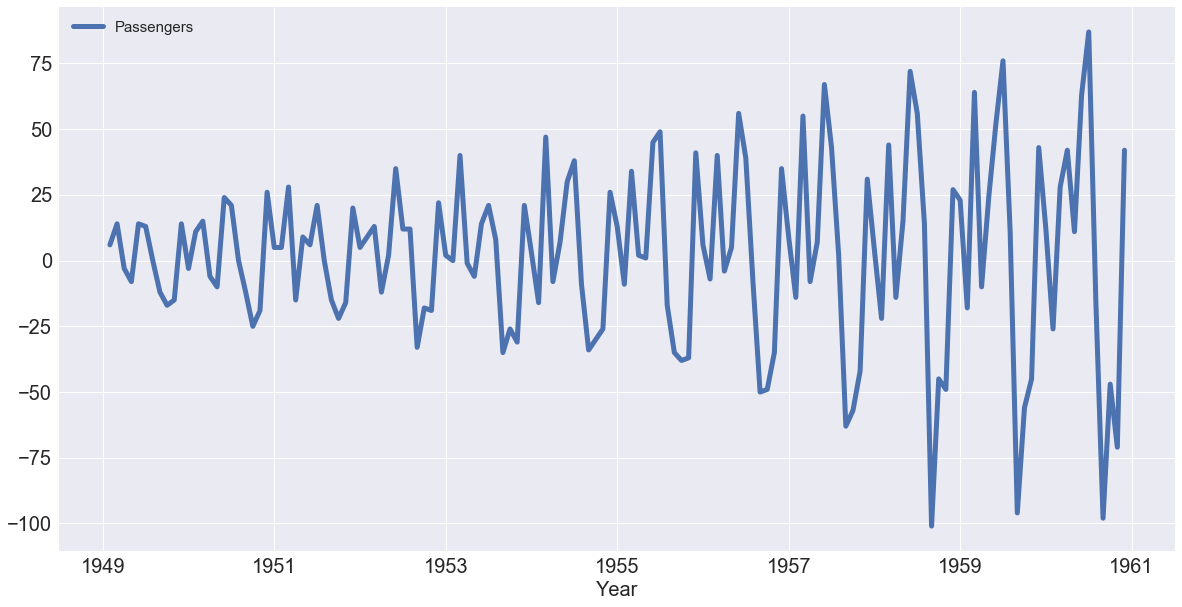

In [10]:
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);